**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

You have been supplied with the dataset `netflix_data.csv` , along with the following table detailing the column names and descriptions:

## The data

### **netflix_data.csv**

| Column         | Description                     |
| -------------- | ------------------------------- |
| `show_id`      | The ID of the show              |
| `type`         | Type of show                    |
| `title`        | Title of the show               |
| `director`     | Director of the show            |
| `cast`         | Cast of the show                |
| `country`      | Country of origin               |
| `date_added`   | Date added to Netflix           |
| `release_year` | Year of Netflix release         |
| `duration`     | Duration of the show in minutes |
| `description`  | Description of the show         |
| `genre`        | Show genre                      |


In [2]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

In [3]:
netflix_df = pd.read_csv('./netflix_data.csv',parse_dates=['date_added'])
netflix_df = netflix_df.dropna()
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,123,A brilliant group of students become card-coun...,Dramas
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,1,A genetics professor experiments with a treatm...,International TV


### Is the Average Duration of Movies Declining?

- Calculate the average duration of movies over different years. 🎬📊
- Visualize the trend in average movie durations over the years. 📈🕰️


In [4]:

# Filter the data to include only movies
movies_data = netflix_df[netflix_df['type'] == 'Movie']

# Group by release year and calculate the average duration
average_durations_by_year = movies_data.groupby('release_year')['duration'].mean()
average_durations_by_year[:15]

release_year
1942     18.000000
1944     76.000000
1945     63.000000
1946     58.000000
1947     42.000000
1954    118.000000
1955    100.333333
1956    101.000000
1958     98.666667
1959    143.000000
1960    131.000000
1962    167.000000
1963    194.000000
1964    228.000000
1965    151.500000
Name: duration, dtype: float64

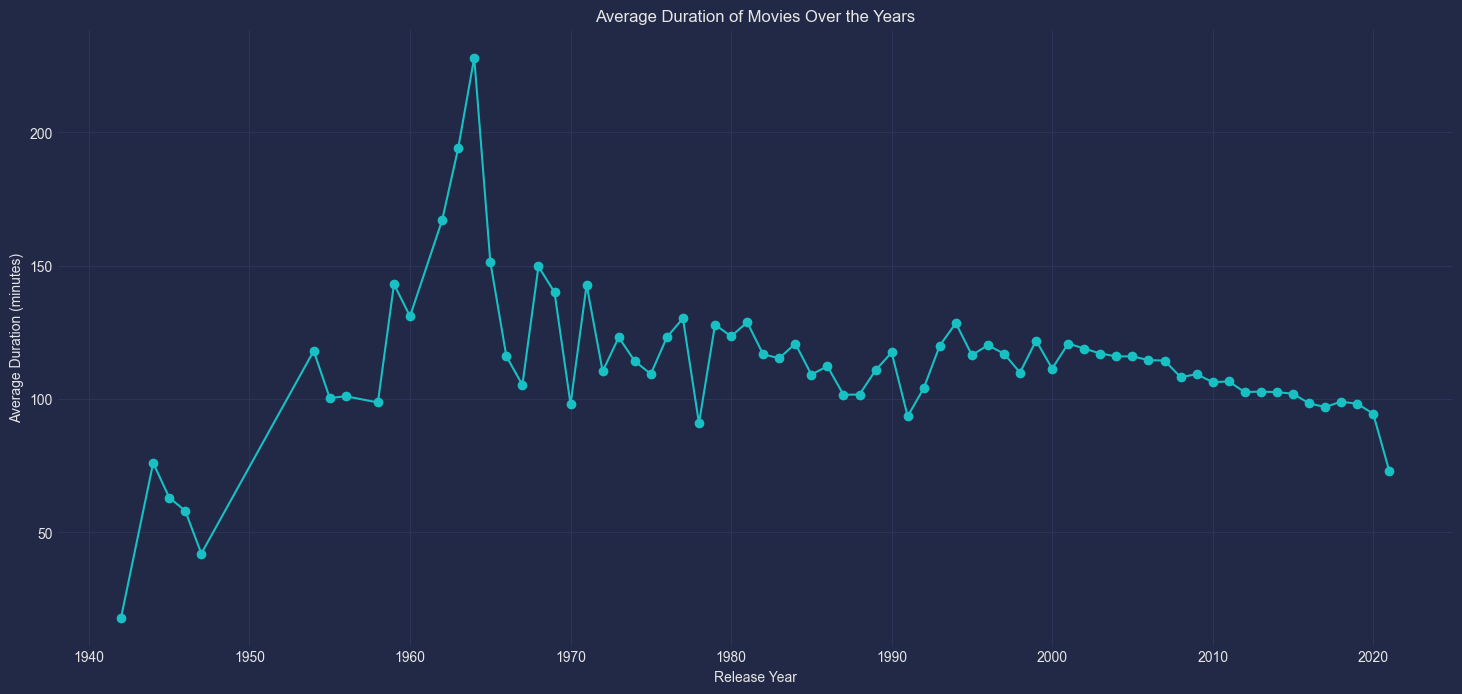

In [5]:
# Plotting the trend
plt.figure(figsize=(18, 8))
plt.plot(average_durations_by_year.index, average_durations_by_year.values, marker='o', linestyle='-')
plt.title('Average Duration of Movies Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Average Duration (minutes)')
# plt.grid(True)
plt.show()

### Comparison of Movie Durations by Genre:

- Analyze the average duration of movies in different genres. 🎥📊
- Identify genres where movies tend to be shorter or longer. 🕰️📉📈


In [6]:
# Group by genre and calculate the average duration
average_durations_by_genre = movies_data.groupby('genre')['duration'].mean().sort_values(ascending=False)
average_durations_by_genre

genre
Classic Movies          118.434783
Action                  113.158046
International Movies    112.240000
Dramas                  111.796724
Sci-Fi                  108.090909
Comedies                107.184645
Cult Movies             103.636364
LGBTQ Movies             99.000000
Independent Movies       98.700000
Thrillers                97.244898
Horror Movies            97.033473
Anime Features           96.222222
Music                    90.500000
Documentaries            84.971591
Romantic Movies          83.333333
Children                 83.244656
Stand-Up                 66.561594
Uncategorized            53.160000
Name: duration, dtype: float64

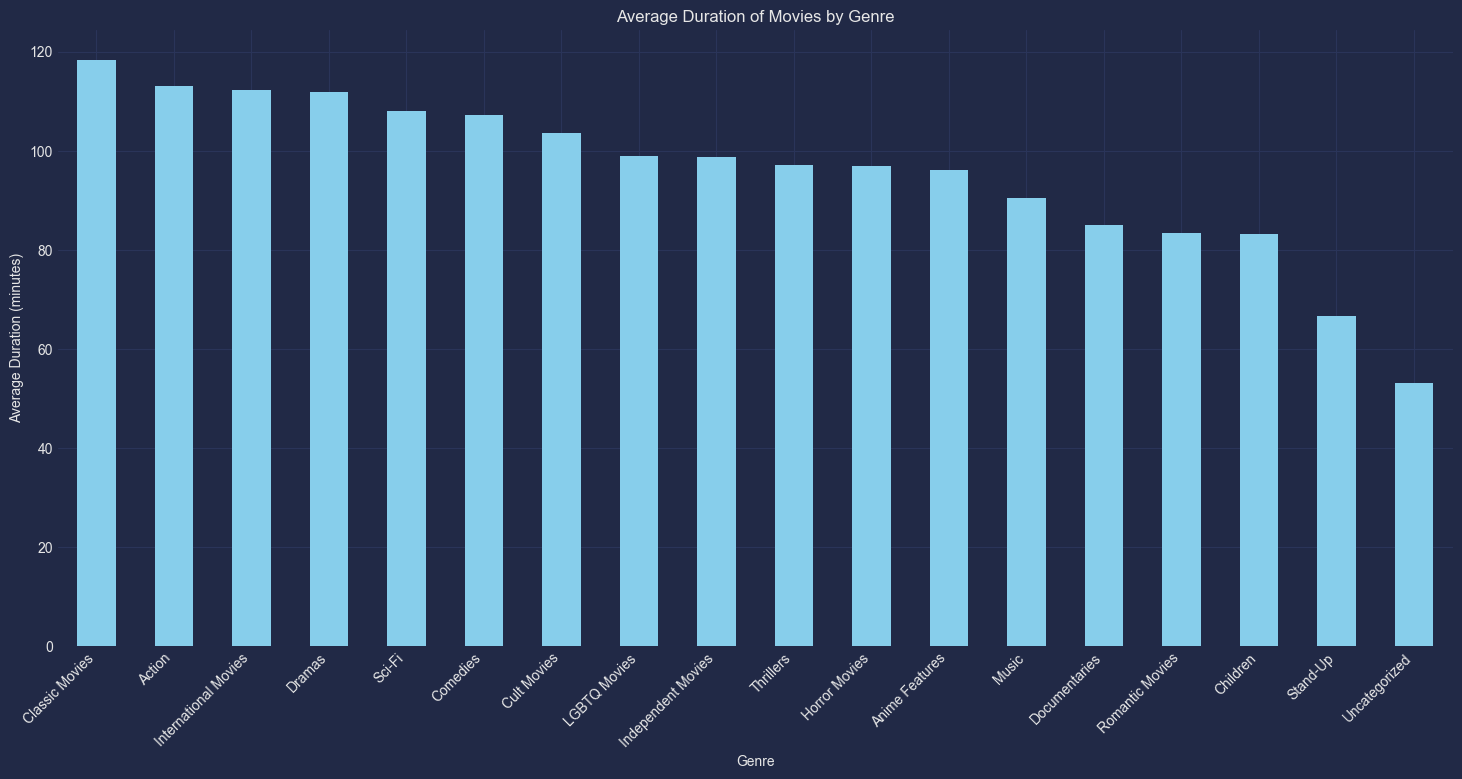

In [7]:
# Plotting the average durations by genre
plt.figure(figsize=(18, 8))
average_durations_by_genre.plot(kind='bar', color='skyblue')
plt.title('Average Duration of Movies by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Duration (minutes)')
plt.xticks(rotation=45, ha='right')
plt.show()

### Effect of Country on Movie Durations:

- Investigate if there's a correlation between the country of origin and movie durations. 🌍🎥📊
- Compare the average duration of movies from different countries. 🕰️📉📈


In [8]:
# Group by country and calculate the average duration
average_durations_by_country = movies_data.groupby('country')['duration'].mean().sort_values(ascending=False)
average_durations_by_country

country
Croatia         157.000000
Soviet Union    147.000000
Pakistan        128.117647
India           128.080420
Romania         124.888889
                   ...    
Uruguay          84.285714
Slovenia         84.000000
Colombia         82.727273
Guatemala        69.000000
Namibia          29.000000
Name: duration, Length: 72, dtype: float64

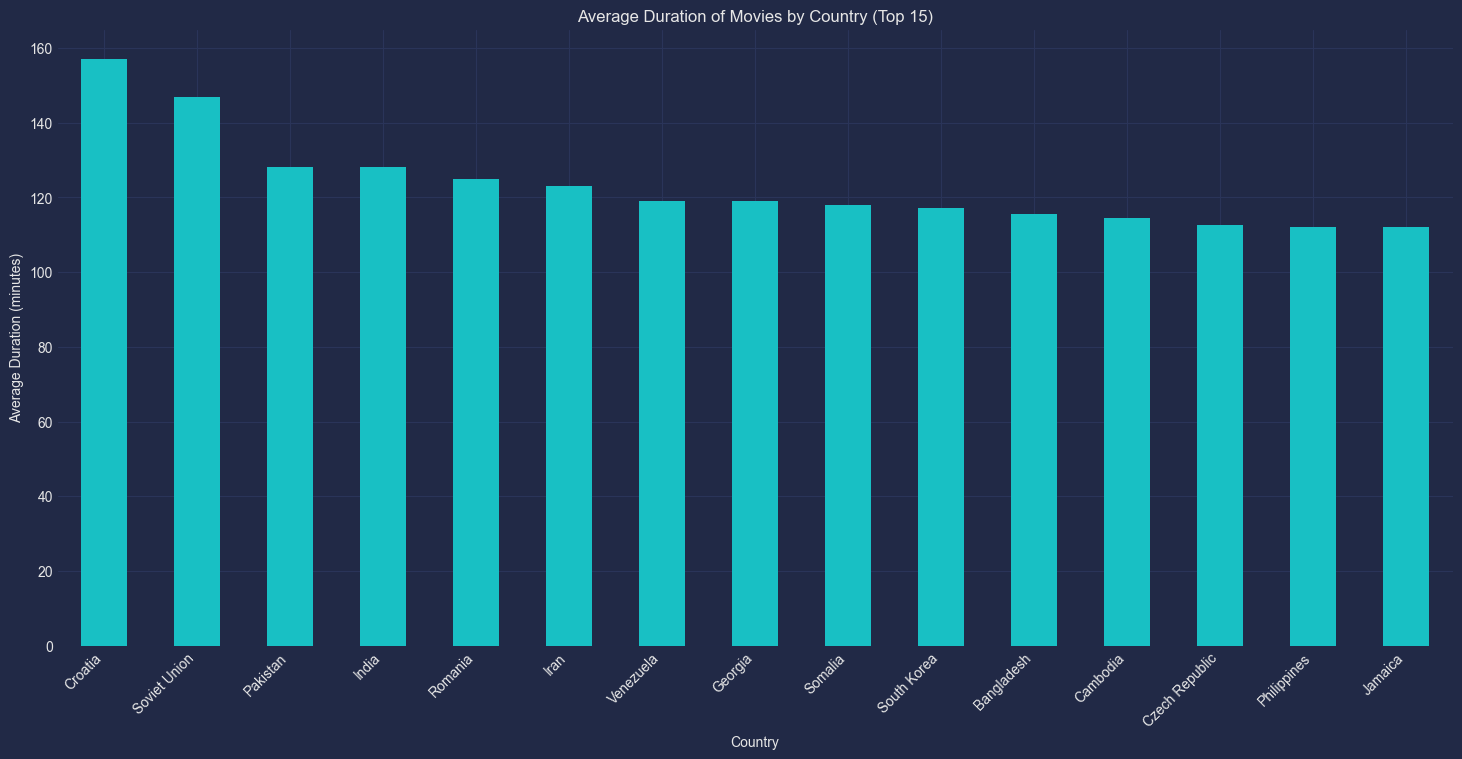

In [9]:
# Plotting the average durations by country
plt.figure(figsize=(18, 8))
average_durations_by_country.head(15).plot(kind='bar')
plt.title('Average Duration of Movies by Country (Top 15)')
plt.xlabel('Country')
plt.ylabel('Average Duration (minutes)')
plt.xticks(rotation=45, ha='right')
plt.show()

### Release Year vs. Duration Trends:

- Explore whether there is a correlation between the release year of a movie and its duration. 📅🎥📊
- Check if newer movies tend to be shorter than older ones. 🕰️🔄📈


In [10]:
correlation_coefficient = movies_data['release_year'].corr(movies_data['duration'])
print(f"Correlation Coefficient: {correlation_coefficient}")


Correlation Coefficient: -0.2137592167290462


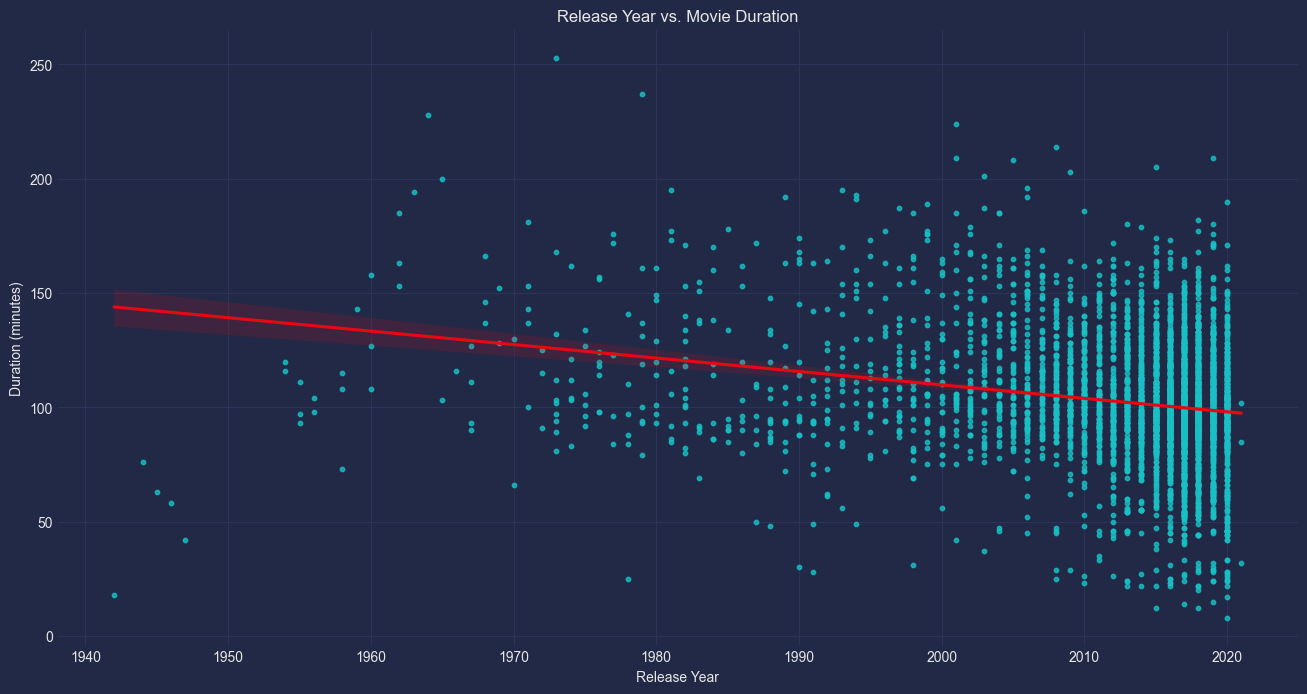

In [11]:
# Scatter plot and regression line to visualize the correlation
plt.figure(figsize=(16, 8))
sns.regplot(x='release_year', y='duration', data=movies_data, scatter_kws={'s':10}, line_kws={'color': '#E50914'})
plt.title('Release Year vs. Movie Duration')
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes)')
plt.grid(True)
plt.show()

### Impact of Directors on Movie Durations:

- Examine whether certain directors are associated with shorter or longer movies. 🎬👥📊
- Identify directors whose movies consistently have a specific duration pattern. 🕰️📉📈


In [12]:
# Group by director and calculate the average duration
average_durations_by_director = movies_data.groupby('director')['duration'].mean().sort_values(ascending=False)
average_durations_by_director

director
Houssam El-Din Mustafa            253.000000
Samir Al Asfory                   237.000000
David Lean                        200.000000
Bassam Kurdali                    196.000000
Karan Johar                       195.333333
                                     ...    
David Lynch                        17.000000
Harry Chaskin                      14.000000
Floyd Russ                         12.000000
Mathieu Auvray                     12.000000
Arnon Manor, Timothy Ware-Hill      8.000000
Name: duration, Length: 3509, dtype: float64

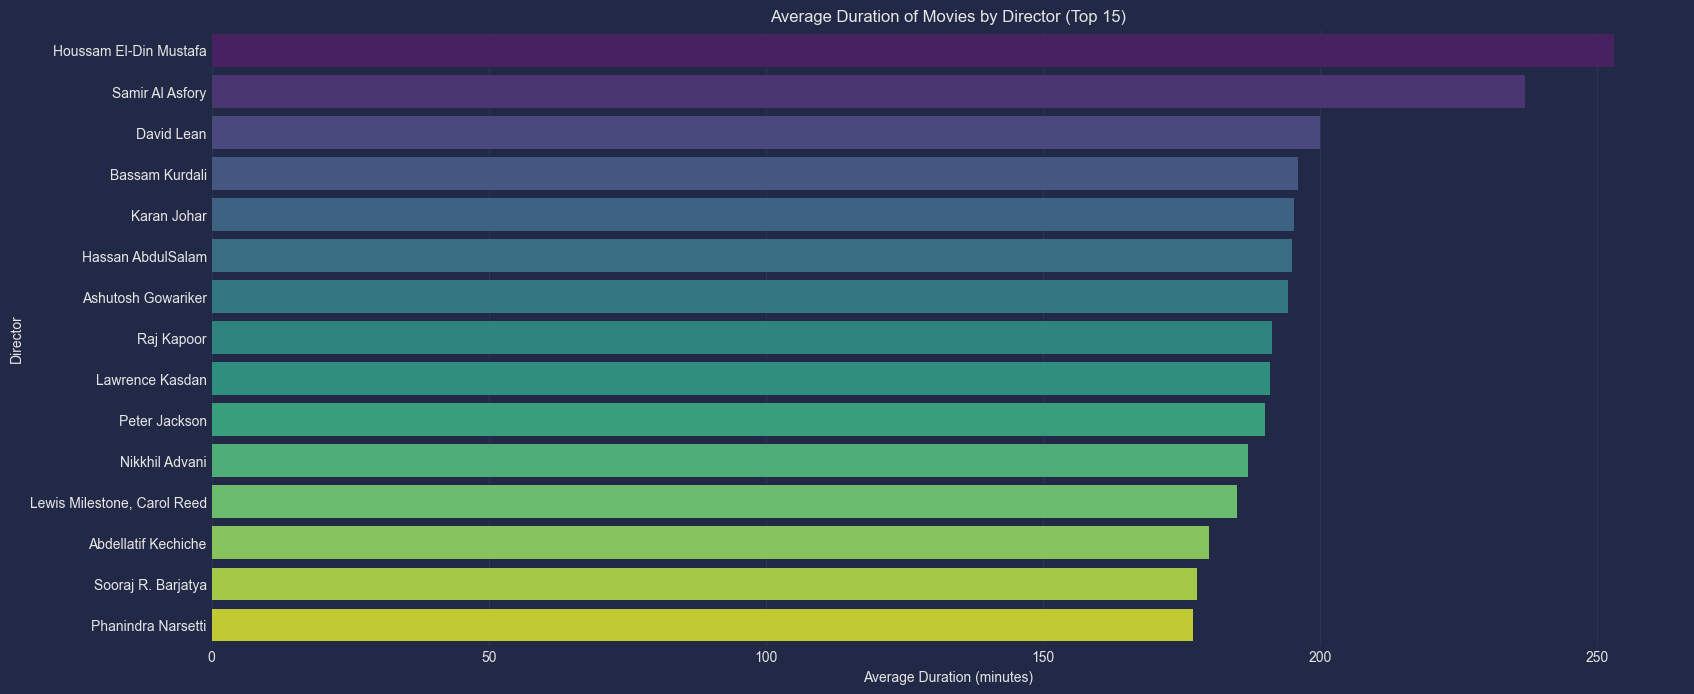

In [13]:
# Plotting the average durations by director
plt.figure(figsize=(19, 8))
sns.barplot(x=average_durations_by_director.head(15).values, y=average_durations_by_director.head(15).index, palette='viridis')
plt.title('Average Duration of Movies by Director (Top 15)')
plt.xlabel('Average Duration (minutes)')
plt.ylabel('Director')
plt.show()

### Analysis of Movie Durations by Type (Movie/TV Show):

- Compare the average duration of movies with that of TV shows. 🎥📺📊
- Determine if there are notable differences between the two. 🕰️🔄📈


In [14]:
# Group by type (Movie/TV Show) and calculate the average duration
average_durations_by_type = netflix_df.groupby('type')['duration'].mean()
average_durations_by_type

type
Movie      102.384648
TV Show      1.940741
Name: duration, dtype: float64

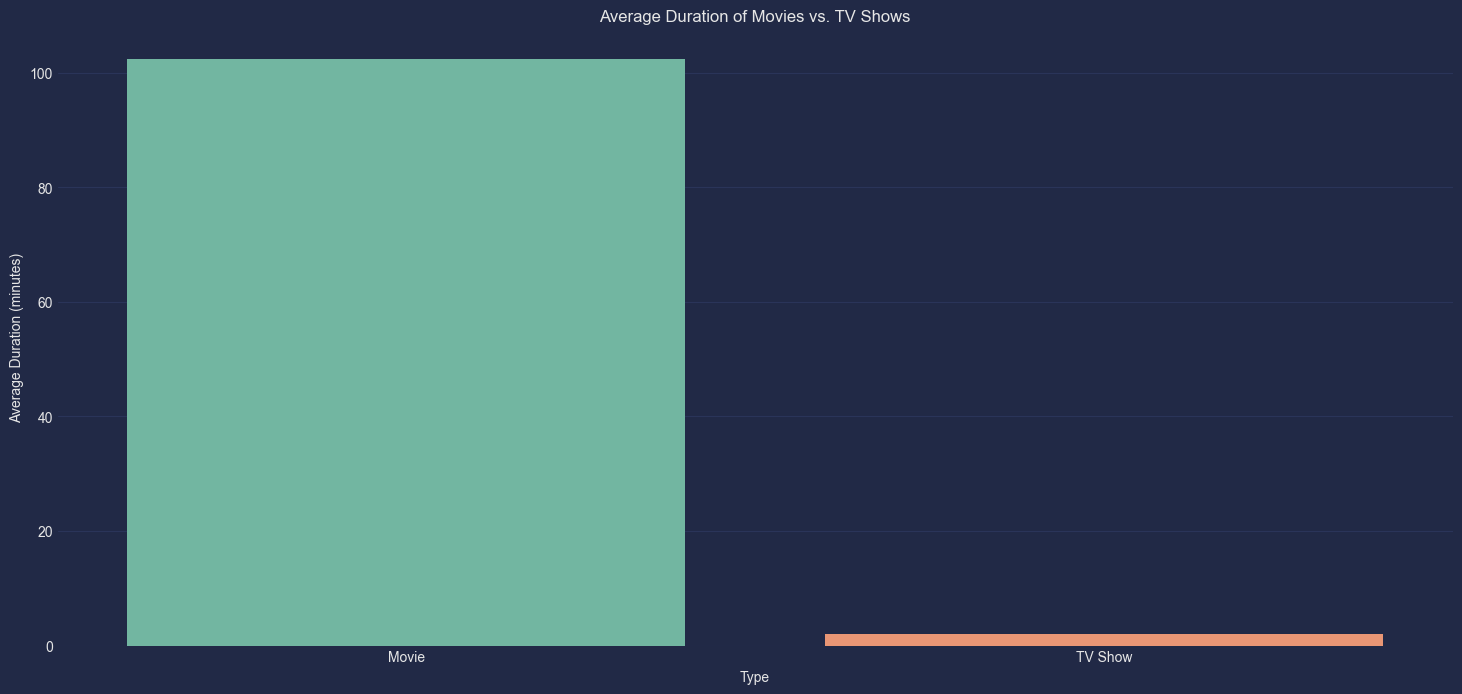

In [15]:
# Plotting the average durations by type
plt.figure(figsize=(18, 8))
sns.barplot(x=average_durations_by_type.index, y=average_durations_by_type.values, palette='Set2')
plt.title('Average Duration of Movies vs. TV Shows')
plt.xlabel('Type')
plt.ylabel('Average Duration (minutes)')
plt.show()

### Changes Over Time:

- Explore if there are specific periods or decades where there was a significant change in average movie durations. 📆🎥📊
- Check if there are any patterns related to industry trends or technological advancements. 🕰️🔄📈


In [16]:
# Filter the data to include only movies
movies_data = netflix_df[netflix_df['type'] == 'Movie'].copy()  # Explicitly create a copy

# Create a new column for decades based on release year
movies_data['decade'] = (movies_data['release_year'] // 10) * 10

# Group by decade and calculate the average duration
average_durations_by_decade = movies_data.groupby('decade')['duration'].mean()
average_durations_by_decade

decade
1940     51.400000
1950    107.090909
1960    144.250000
1970    119.083333
1980    113.557895
1990    115.120219
2000    113.424448
2010     99.797980
2020     94.270115
Name: duration, dtype: float64

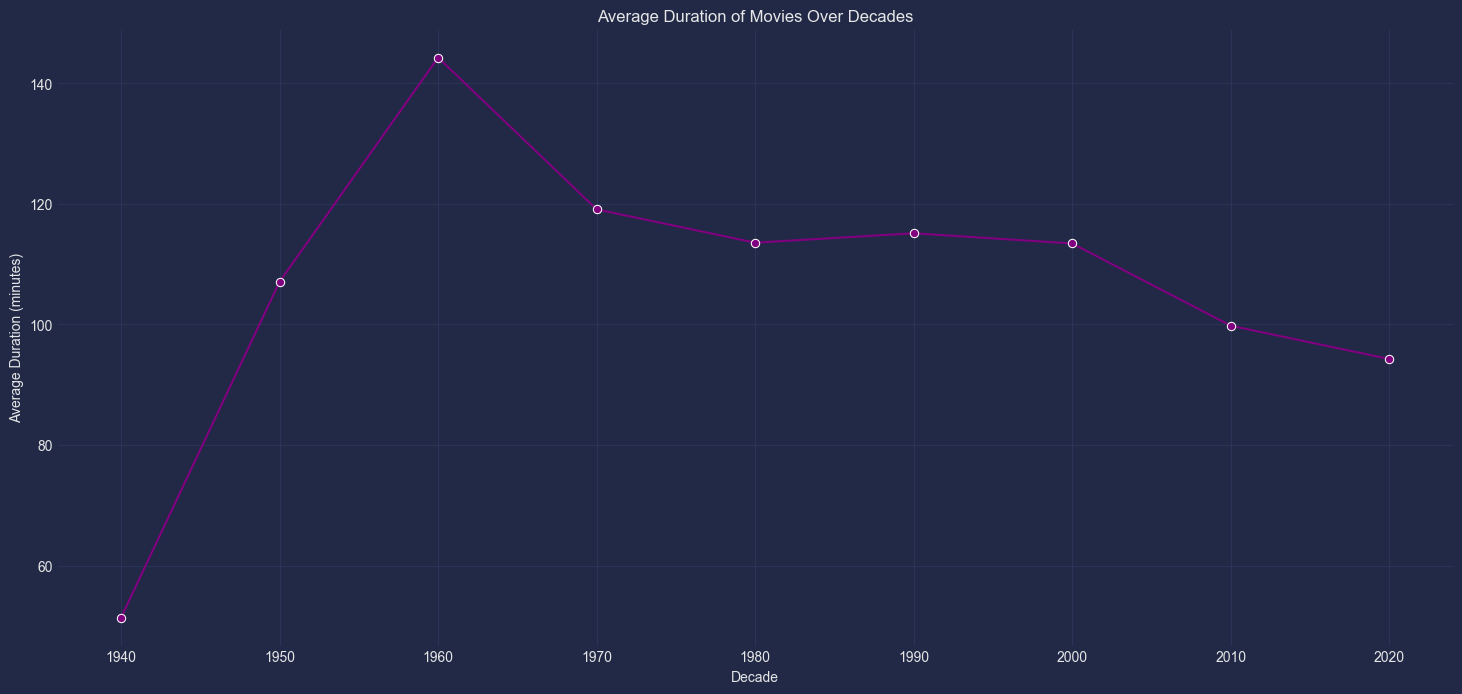

In [17]:
# Plotting the average durations by decade
plt.figure(figsize=(18, 8))
sns.lineplot(x=average_durations_by_decade.index, y=average_durations_by_decade.values, marker='o', color='purple')
plt.title('Average Duration of Movies Over Decades')
plt.xlabel('Decade')
plt.ylabel('Average Duration (minutes)')
plt.grid(True)
plt.show()

### Top Countries with Shortest/Longest Movies:

- Identify countries that produce movies with the shortest and longest durations. 🌍🎥📊
- Investigate if there are cultural or regional factors influencing movie lengths. 🕰️🔄🌐


In [18]:
# Group by country and calculate the average duration
average_durations_by_country = movies_data.groupby('country')['duration'].mean().sort_values()
average_durations_by_country

country
Namibia          29.000000
Guatemala        69.000000
Colombia         82.727273
Slovenia         84.000000
Uruguay          84.285714
                   ...    
Romania         124.888889
India           128.080420
Pakistan        128.117647
Soviet Union    147.000000
Croatia         157.000000
Name: duration, Length: 72, dtype: float64

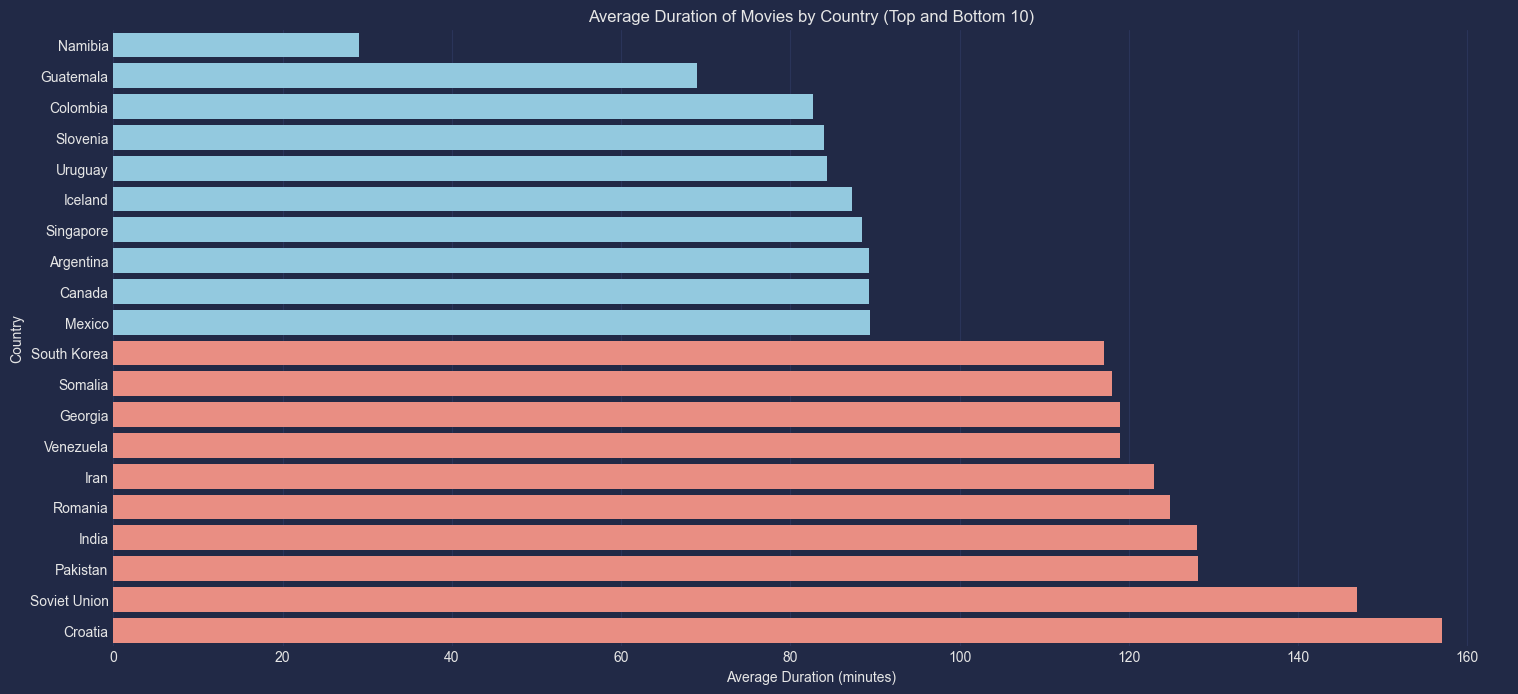

In [19]:
# Select top and bottom 10 countries
top_10 = average_durations_by_country.head(10)
bottom_10 = average_durations_by_country.tail(10)
top_and_bottom_10 = pd.concat([top_10, bottom_10])
# Create a color palette with different colors for top and bottom
colors = ['skyblue'] * 10 + ['salmon'] * 10
# Create a hue list for legend
hue_list = ['Top 10'] * 10 + ['Bottom 10'] * 10
# Plotting the average durations by country (Top and Bottom 10)
plt.figure(figsize=(18, 8))
sns.barplot(x=top_and_bottom_10.values, y=top_and_bottom_10.index, palette=colors)
plt.title('Average Duration of Movies by Country (Top and Bottom 10)')
plt.xlabel('Average Duration (minutes)')
plt.ylabel('Country')

plt.show()

### Keywords in Descriptions:

- Identify keywords or phrases in movie descriptions that are associated with longer or shorter durations. 📝🎥🔍🕰️


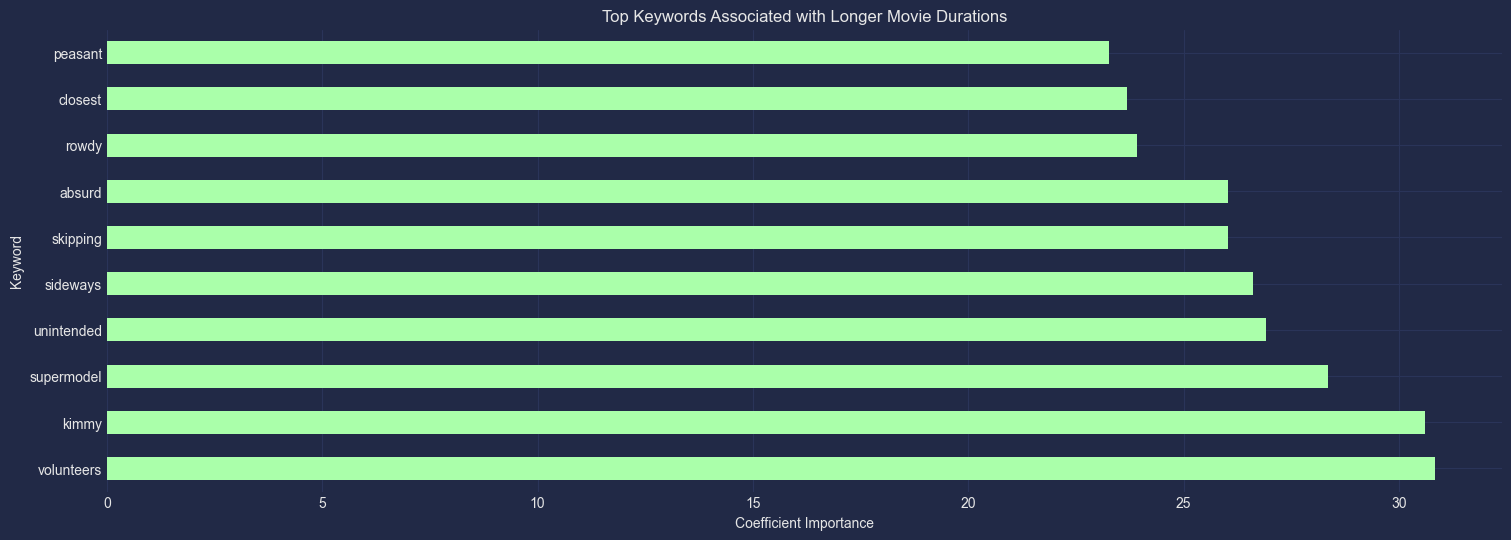

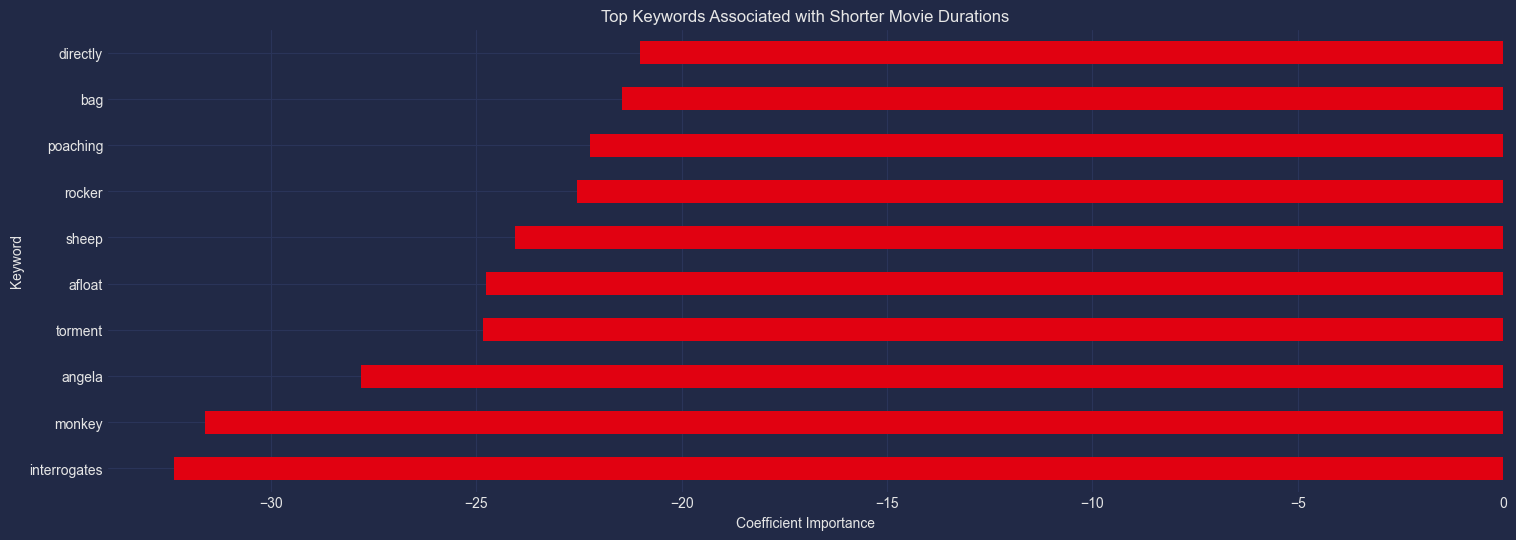

In [21]:
# Filter the data to include only movies with both descriptions and durations
movies_data = netflix_df[(netflix_df['type'] == 'Movie') & movies_data['duration'].notna() & movies_data['description'].notna()]

# Define X (description) and y (duration)
X = movies_data['description']
y = movies_data['duration']

# Use CountVectorizer to convert text data into a matrix of token counts
vectorizer = CountVectorizer(stop_words='english')
X_matrix = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_matrix, y, test_size=0.2, random_state=42)

# Train a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Extract the coefficients (importance) of each word/phrase
feature_importance = pd.Series(model.coef_, index=vectorizer.get_feature_names_out())

# Display the top keywords associated with longer and shorter durations
top_keywords_longer = feature_importance.sort_values(ascending=False).head(10)
top_keywords_shorter = feature_importance.sort_values().head(10)

# Plotting the top keywords associated with longer durations
plt.figure(figsize=(18, 6))
top_keywords_longer.plot(kind='barh',color='#afa')
plt.title('Top Keywords Associated with Longer Movie Durations')
plt.xlabel('Coefficient Importance')
plt.ylabel('Keyword')
plt.show()

# Plotting the top keywords associated with shorter durations
plt.figure(figsize=(18, 6))
top_keywords_shorter.plot(kind='barh', color='#e10111')
plt.title('Top Keywords Associated with Shorter Movie Durations')
plt.xlabel('Coefficient Importance')
plt.ylabel('Keyword')
plt.show()
